# Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [30]:
sns.set()

In [184]:
import warnings
warnings.filterwarnings('ignore')

# Loading Files

In [3]:
for dirname, _, filenames in os.walk('/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/datasetSplit.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/dictionary.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/STree.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/datasetSentences.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/README.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/sentiment_labels.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/original_rt_snippets.txt
/Users/azamkhan/github/dme/sentiment-movie/stanfordSentimentTreebank/SOStr.txt


In [14]:
df = pd.read_csv(dirname + '/' + 'dictionary.txt',sep='|')
df.columns = ['body_text','phrase ids']
df2 = pd.read_csv(dirname + '/' + 'sentiment_labels.txt',sep='|')
df3 = df.merge(df2,how='left',on='phrase ids')
print(df3.head(5))

       body_text  phrase ids  sentiment values
0            ! '       22935           0.52778
1           ! ''       18235           0.50000
2         ! Alas      179257           0.44444
3    ! Brilliant       22936           0.86111
4  ! Brilliant !       40532           0.93056


In [17]:
def create_label(x):
    label = ""
    if (x >= 0 and x <= 0.2):
        label += 'very negative'
    if (x > 0.2 and x <= 0.4):
        label += 'negative'
    if (x > 0.4 and x <= 0.6):
        label += 'neutral'
    if (x > 0.6 and x <= 0.8):
        label += 'positive'
    if (x > 0.8 and x <= 1.0):
        label += 'very positive'
    return label

#create a label column as you please based on the sentiment values (0 to 1)
df3['label']=df3['sentiment values'].apply(lambda x:create_label(x))

In [169]:
list(df3[df3['phrase ids'] == 226166].body_text)

["The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal ."]

In [159]:
list(df3[df3['phrase ids'] == 14487].body_text)

["The Rock is destined to be the 21st Century 's new '' Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal ."]

# Numerical Data Descriptions

In [127]:
df3[['sentiment values']].describe()

sentiment values
count     239231.000000
mean           0.513001
std            0.175356
min            0.000000
25%            0.416670
50%            0.500000
75%            0.611110
max            1.000000

In [178]:
df3[['sentiment values']].var()

sentiment values    0.03075
dtype: float64

In [175]:
df3[['sentiment values']].mode()

sentiment values
0               0.5

In [131]:
df3[['sentiment values']].skew(axis = 0, skipna = True) 

sentiment values   -0.037271
dtype: float64

In [136]:
df3[['sentiment values']].kurtosis(axis=0)

sentiment values   -0.014014
dtype: float64

# Class Distribution

In [24]:
df3.groupby('label')['body_text'].nunique()

label
negative          43028
neutral          119448
positive          50148
very negative     11352
very positive     15255
Name: body_text, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

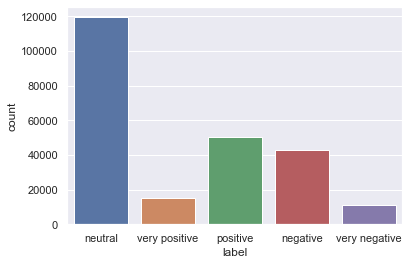

In [33]:
sns.countplot(x = df3['label'])

# Sentiment Values

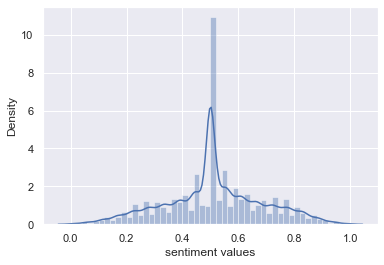

In [185]:
fig, ax = plt.subplots()
sns.distplot(df3['sentiment values'], ax=ax);

In [34]:
df3.describe()

phrase ids  sentiment values
count  239231.000000     239231.000000
mean   119616.000000          0.513001
std     69060.185462          0.175356
min         1.000000          0.000000
25%     59808.500000          0.416670
50%    119616.000000          0.500000
75%    179423.500000          0.611110
max    239231.000000          1.000000

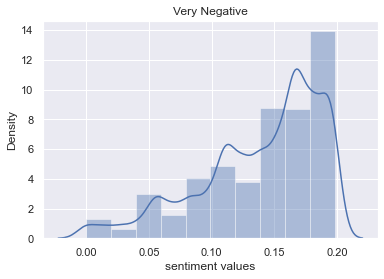

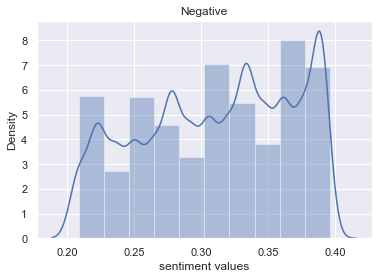

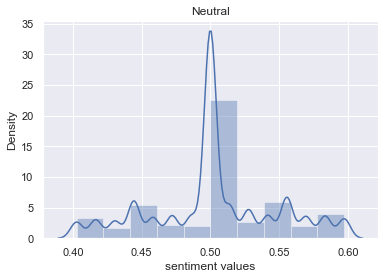

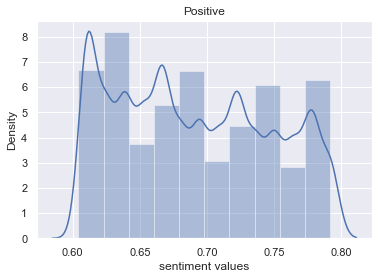

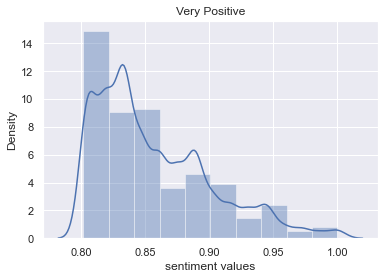

In [186]:
fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'very negative']['sentiment values'], ax=ax, bins = 10).set_title('Very Negative');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'negative']['sentiment values'], ax=ax, bins = 10).set_title('Negative');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'neutral']['sentiment values'], ax=ax, bins = 10).set_title('Neutral');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'positive']['sentiment values'], ax=ax, bins = 10).set_title('Positive');

fig, ax = plt.subplots()
sns.distplot(df3[df3['label'] == 'very positive']['sentiment values'], ax=ax, bins = 10).set_title('Very Positive');

# Word Clouds

In [54]:
from wordcloud import WordCloud

In [170]:
# VERY NEGATIVE WORD CLOUD

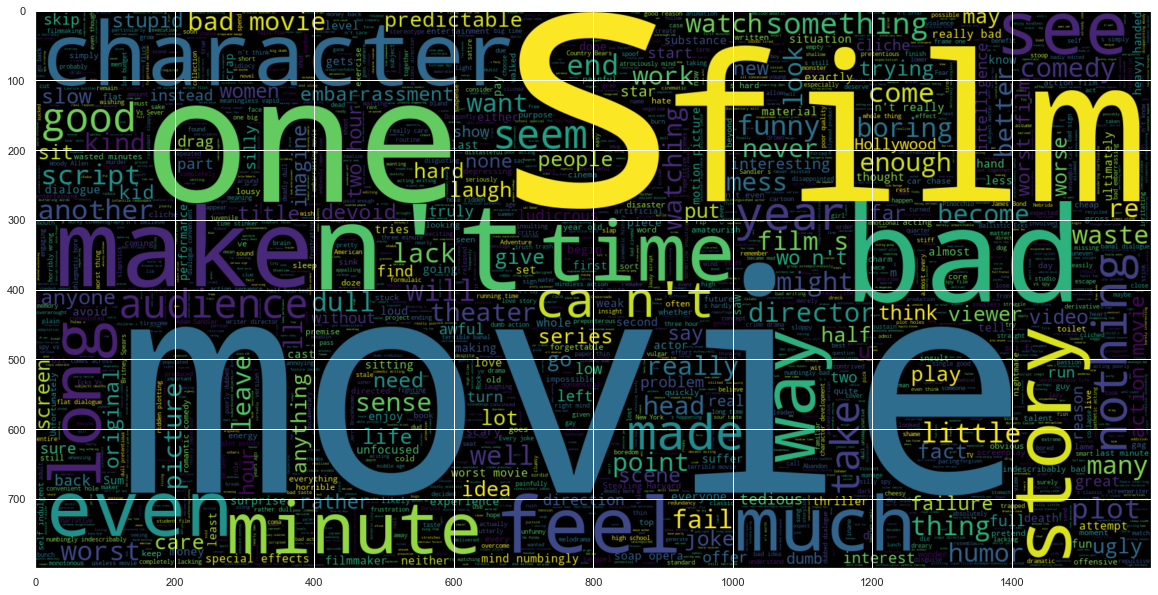

In [57]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df3[df3['label'] == 'very negative'].body_text))
plt.imshow(wc , interpolation = 'bilinear')

In [171]:
# VERY POSITIVE WORD CLOUD

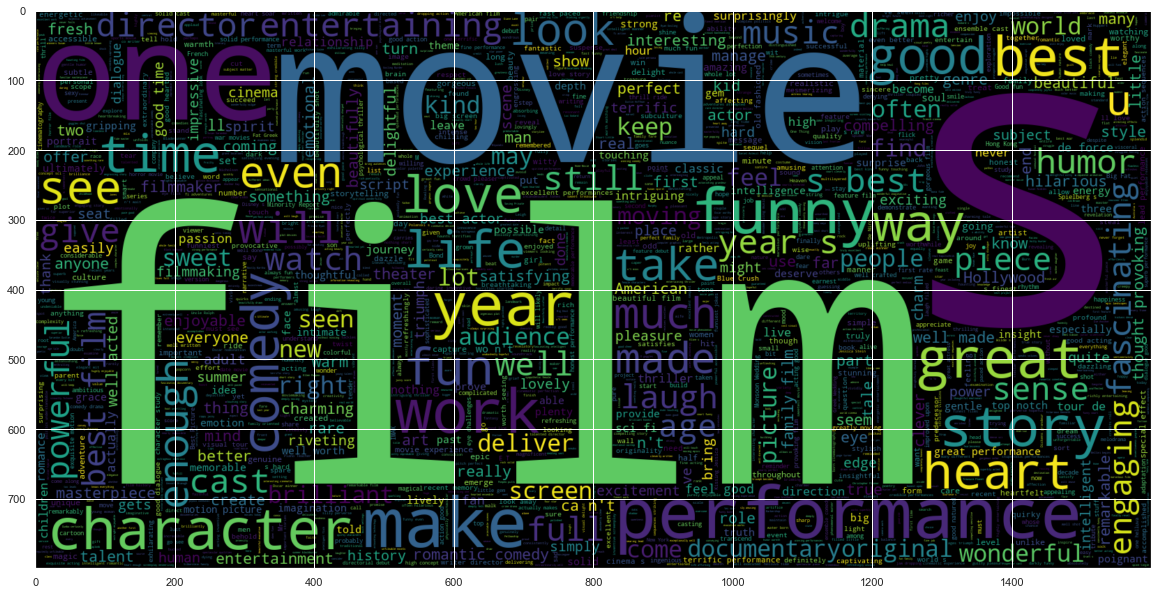

In [172]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df3[df3['label'] == 'very positive'].body_text))
plt.imshow(wc , interpolation = 'bilinear')

In [173]:
# NEUTRAL WORD CLOUD

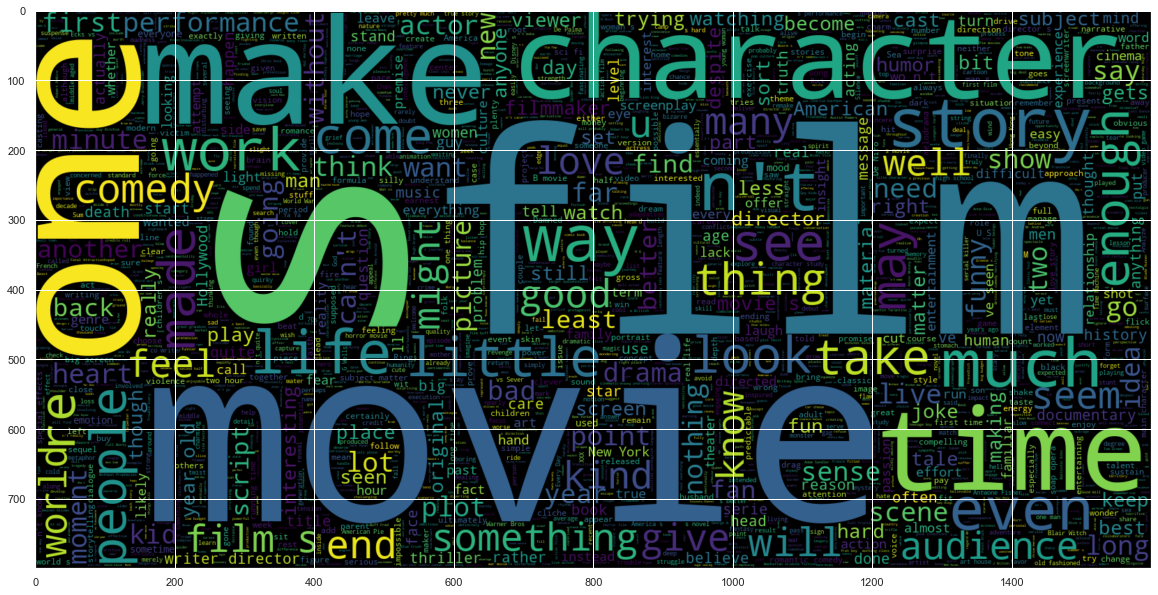

In [174]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df3[df3['label'] == 'neutral'].body_text))
plt.imshow(wc , interpolation = 'bilinear')

# Phrase analysis

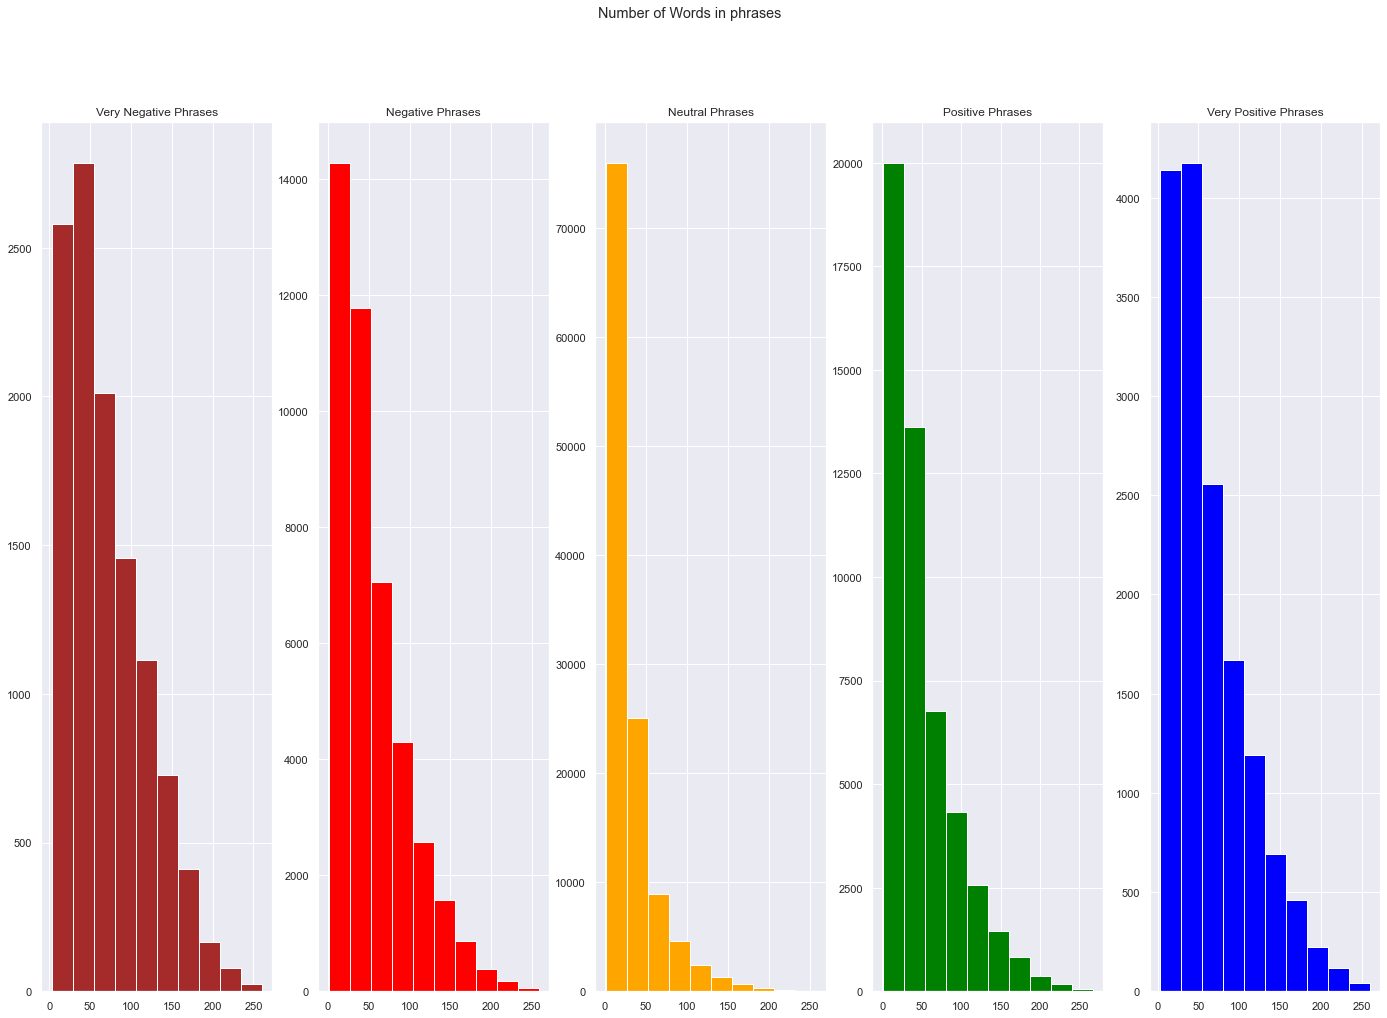

In [181]:
fig,(ax1,ax2,ax3, ax4, ax5)=plt.subplots(1,5,figsize=(24,16))

text_len=df3[df3['label']=='very negative']['body_text'].str.len()
ax1.hist(text_len,color='brown')
ax1.set_title('Very Negative Phrases')

text_len=df3[df3['label']=='negative']['body_text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Phrases')

text_len=df3[df3['label']=='neutral']['body_text'].str.len()
ax3.hist(text_len,color='orange')
ax3.set_title('Neutral Phrases')

text_len=df3[df3['label']=='positive']['body_text'].str.len()
ax4.hist(text_len,color='green')
ax4.set_title('Positive Phrases')

text_len=df3[df3['label']=='very positive']['body_text'].str.len()
ax5.hist(text_len,color='blue')
ax5.set_title('Very Positive Phrases')

fig.suptitle('Number of Words in phrases')
plt.show()

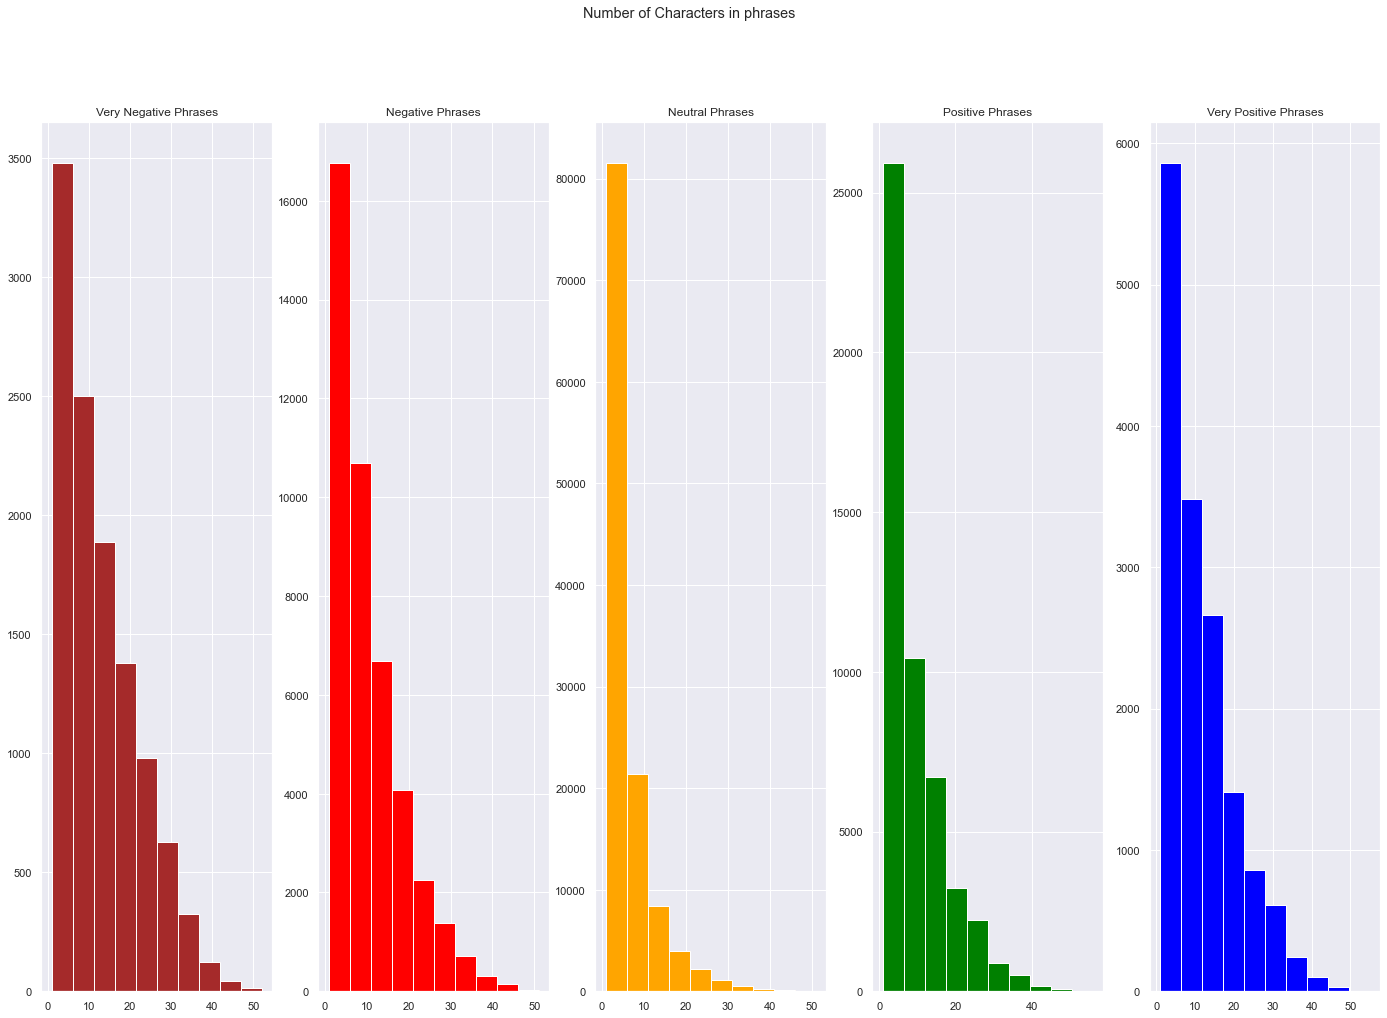

In [182]:
fig,(ax1,ax2,ax3, ax4, ax5)=plt.subplots(1,5,figsize=(24,16))

text_len=df3[df3['label']=='very negative']['body_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='brown')
ax1.set_title('Very Negative Phrases')

text_len=df3[df3['label']=='negative']['body_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Phrases')

text_len=df3[df3['label']=='neutral']['body_text'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='orange')
ax3.set_title('Neutral Phrases')

text_len=df3[df3['label']=='positive']['body_text'].str.split().map(lambda x: len(x))
ax4.hist(text_len,color='green')
ax4.set_title('Positive Phrases')

text_len=df3[df3['label']=='very positive']['body_text'].str.split().map(lambda x: len(x))
ax5.hist(text_len,color='blue')
ax5.set_title('Very Positive Phrases')

fig.suptitle('Number of Characters in phrases')
plt.show()

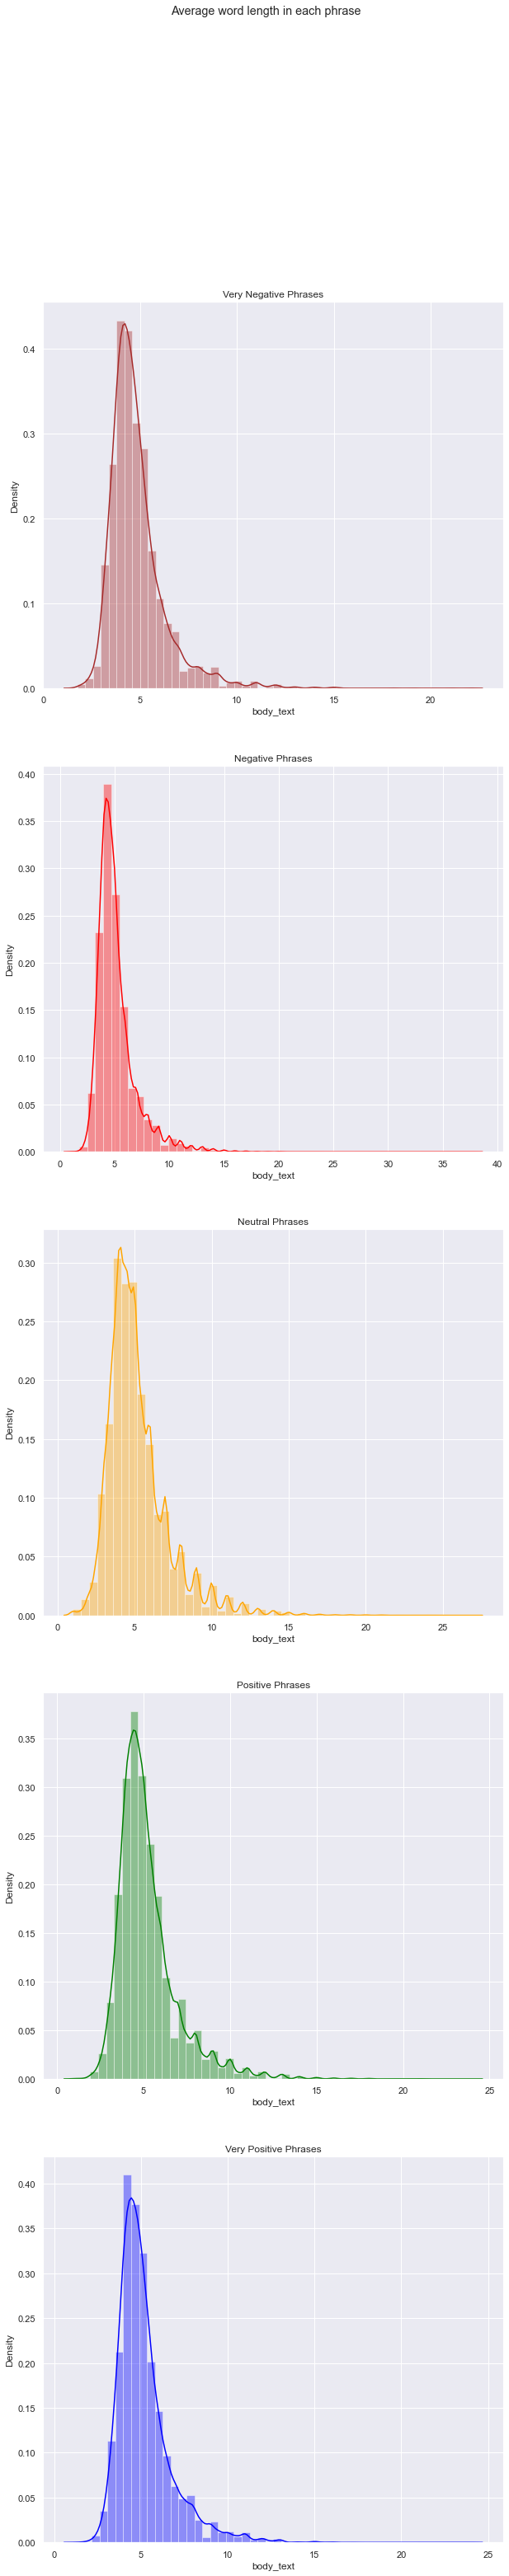

In [190]:
fig,(ax1,ax2,ax3, ax4, ax5)=plt.subplots(5,1,figsize=(10,50))

text_len=df3[df3['label']=='very negative']['body_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)),ax=ax1,color='brown')
ax1.set_title('Very Negative Phrases')

text_len=df3[df3['label']=='negative']['body_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Phrases')

text_len=df3[df3['label']=='neutral']['body_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)),ax=ax3,color='orange')
ax3.set_title('Neutral Phrases')

text_len=df3[df3['label']=='positive']['body_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)),ax=ax4,color='green')
ax4.set_title('Positive Phrases')

text_len=df3[df3['label']=='very positive']['body_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)),ax=ax5,color='blue')
ax5.set_title('Very Positive Phrases')

fig.subplots_adjust(hspace=0.2)
fig.suptitle('Average word length in each phrase')
plt.show()

# n-gram Analysis

In [66]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df3.body_text)
corpus[:5]

['!', "'", '!', "''", '!']

In [67]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'the': 75748,
 ',': 70577,
 'a': 54483,
 'of': 51681,
 'and': 51430,
 '.': 38004,
 'to': 36783,
 "'s": 28200,
 'is': 22800,
 'in': 22184}

In [68]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
import plotly.express as px

In [77]:
most_common_uni = get_top_text_ngrams(df3.body_text,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [79]:
most_common_bi = get_top_text_ngrams(df3.body_text,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [124]:
most_common_tri = get_top_text_ngrams(df3[df3['label'] == 'very negative'].body_text,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Very Negative Phrases', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [125]:
most_common_tri = get_top_text_ngrams(df3[df3['label'] == 'very positive'].body_text,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Very Positive Phrases', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()